In [4]:
import thesis_library
from multiprocessing import Pool
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Previous day values

### Best theta on day 1

Зафитим кривую на ставки ЦБ на первый день. Дальше будем использовать веса предыдущего дня.

In [4]:
cbr_maturities = np.array([0.25, 0.50, 0.75, 1.00, 2.00, 3.00, 5.00, 7.00, 10.00, 15.00, 20.00, 30.00])
cbr_rates_301215 = np.array([9.05, 9.67, 10.01, 10.17, 10.14, 9.97, 9.78, 9.69, 9.56, 9.47, 9.43, 9.40])

In [5]:
def fit_curve(theta):
    return ((cbr_rates_040116 - thesis_library.nss(cbr_maturities, theta))**2).sum()

In [6]:
theta0 = np.array([10, 10, 10, 10, 10, 10])

best_theta = minimize(fit_curve, theta0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True, 'maxiter': 10000})

Optimization terminated successfully.
         Current function value: 0.003174
         Iterations: 2142
         Function evaluations: 3348


In [7]:
best_theta.x

array([ 0.53856817,  1.47032633,  9.19966626, -1.41323065,  3.39936108,
        1.49109959])

## BFGS

In [14]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    if i != 0:        
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'BFGS', theta0 = thetas[i - 1])        
    else:
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'BFGS', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/bfgs_recurrent.csv')

C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:34: RuntimeWarning: overflow encountered in exp
  df['Discounted'] = (df['Сумма купона, RUB'] + df['Погашение номинала, RUB']) * np.exp(-nss(m = df['Дата фактической выплаты'], theta = theta)/100 * df['Дата фактической выплаты'])
C:\Users\1\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:34: RuntimeWarning: overflow encountered in exp
  df['Discounted'] = (df['Сумма купона, RUB'] + df['Погашение номинала, RUB']) * np.exp(-nss(m = df['Дата 

Wall time: 7min 1s


## Gauss-Newton

In [ ]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    if i != 0:        
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'BFGS', theta0 = thetas[i - 1])        
    else:
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'BFGS', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/bfgs_recurrent.csv')

## Nelder-Mead

In [15]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    if i != 0:        
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'nelder-mead', theta0 = thetas[i - 1])        
    else:
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'nelder-mead', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/nelder_mead_recurrent.csv')

C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:34: RuntimeWarning: overflow encountered in exp
  df['Discounted'] = (df['Сумма купона, RUB'] + df['Погашение номинала, RUB']) * np.exp(-nss(m = df['Дата фактической выплаты'], theta = theta)/100 * df['Дата фактической выплаты'])
C:\Users\1\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:34: RuntimeWarning: overflow encountered in exp
  df['Discounted'] = (df['Сумма купона, RUB'] + df['Погашение номинала, RUB']) * np.exp(-nss(m = df['Дата 

Wall time: 8min 24s


## Powell

In [16]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    if i != 0:        
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'powell', theta0 = thetas[i - 1])        
    else:
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'powell', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/powell_recurrent.csv')

C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:34: RuntimeWarning: overflow encountered in exp
  df['Discounted'] = (df['Сумма купона, RUB'] + df['Погашение номинала, RUB']) * np.exp(-nss(m = df['Дата фактической выплаты'], theta = theta)/100 * df['Дата фактической выплаты'])
C:\Users\1\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:34: RuntimeWarning: overflow encountered in exp
  df['Discounted'] = (df['Сумма купона, RUB'] + df['Погашение номинала, RUB']) * np.exp(-nss(m = df['Дата 

Wall time: 6min 54s


# Random starting values

### Values generated

In [8]:
np.random.seed(2)

rand_thetas = [np.concatenate([np.array([i]), np.random.uniform(low=0, high=30, size = 2), 
                              np.random.uniform(low=0, high=10, size = 2), np.random.uniform(low=-10, high=10, size = 2)
                              ]) for i in range(1, 17)]

C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:30: RuntimeWarning: invalid value encountered in true_divide
  return beta0 + beta1 * (1 - np.exp(- m / tau1)) / (m / tau1) + beta2 * ((1 - np.exp(- m / tau1)) / (m / tau1) - np.exp(- m / tau1)) + beta3 * ((1 - np.exp(- m / tau2)) / (m / tau2) - np.exp(- m / tau2))


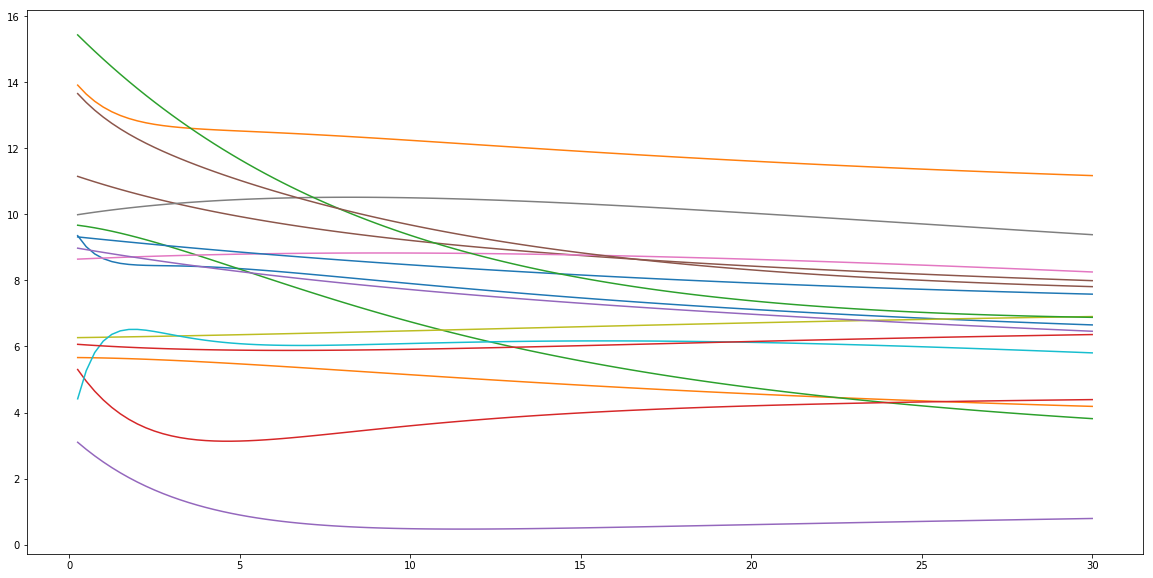

In [30]:
maturities = np.linspace(0, 30, 121)

plt.figure(figsize=(20, 10))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[0][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[1][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[2][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[3][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[4][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[5][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[6][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[7][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[8][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[9][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[10][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[11][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[12][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[13][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[14][1:]))
plt.plot(maturities, thesis_library.nss(maturities, theta = rand_thetas[15][1:]));

## BFGS

### 1 - 4

In [12]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_bfgs, rand_thetas[:4])

Wall time: 38min 41s


### 5 - 8

In [13]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_bfgs, rand_thetas[4:8])

Wall time: 59min 41s


### 9 - 12

In [16]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_bfgs, rand_thetas[8:12])

Wall time: 36min 59s


### 13 - 16

In [17]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_bfgs, rand_thetas[12:16])

Wall time: 45min 26s


## Gauss-Newton

### 1 - 4

In [12]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_gauss_newton, rand_thetas[:4])

Wall time: 38min 41s


### 5 - 8

In [13]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_gauss_newton, rand_thetas[4:8])

Wall time: 59min 41s


### 9 - 12

In [16]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_gauss_newton, rand_thetas[8:12])

Wall time: 36min 59s


### 13 - 16

In [17]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_gauss_newton, rand_thetas[12:16])

Wall time: 45min 26s


## Nelder-Mead

### 1 - 4

In [18]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_nelder_mead, rand_thetas[:4])

Wall time: 38min 45s


### 5 - 8

In [19]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_nelder_mead, rand_thetas[4:8])

Wall time: 1h 36s


### 9 - 12

In [20]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_nelder_mead, rand_thetas[8:12])

Wall time: 36min 13s


### 13 - 16

In [21]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_nelder_mead, rand_thetas[12:16])

Wall time: 45min 36s


## Powell

### 1 - 4

In [22]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_powell, rand_thetas[:4])

Wall time: 38min 51s


### 5 - 8

In [23]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_powell, rand_thetas[4:8])

Wall time: 1h 32s


### 9 - 12

In [24]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_powell, rand_thetas[8:12])

Wall time: 36min 32s


### 13 - 16

In [25]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.optimize_ss_powell, rand_thetas[12:16])

Wall time: 45min 40s


# PSO

In [26]:
intervals = [np.array([0, 62]), np.array([62, 126]), np.array([126, 189]), np.array([189, 251])]

In [28]:
%%time

with Pool(processes=4) as pool: 

    pool.map(thesis_library.pso_multithread, intervals)

Wall time: 1h 22min 20s


# Flat 7%, tau 3 and 7

## BFGS

In [31]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'bfgs', theta0 = np.array([3, 7, 7, 0, 0, 0]))

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/bfgs_flat_rate.csv')

C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:69: RuntimeWarning: overflow encountered in square
  J = (((np.array(result_df['Discounted']) - np.array(result_df['Market prices']))/1000)**2).sum()
C:\Users\1\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\

Wall time: 34min 31s


## Gauss-Newton

In [ ]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'Gauss-Newton', theta0 = np.array([3, 7, 7, 0, 0, 0]))

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/gauss_newton_flat_rate.csv')

## Nelder-Mead

In [ ]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'nelder-mead', theta0 = np.array([3, 7, 7, 0, 0, 0]))

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/nelder_mead_flat_rate.csv')

C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:69: RuntimeWarning: overflow encountered in square
  J = (((np.array(result_df['Discounted']) - np.array(result_df['Market prices']))/1000)**2).sum()
C:\Users\1\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\

Wall time: 34min 25s


## Powell

In [ ]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'powell', theta0 = np.array([3, 7, 7, 0, 0, 0]))

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('C:/Users/1/Desktop/Comparing-numerical-methods-for-term-structure-fitting/Thetas/powell_flat_rate.csv')

C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:118: OptimizeWarning: Unknown solver options: xtol
  res = minimize(loss_func, theta0, method='BFGS', options={'xtol': 1e-8, 'disp': False, 'maxiter': 100000})
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\thesis_library.py:69: RuntimeWarning: overflow encountered in square
  J = (((np.array(result_df['Discounted']) - np.array(result_df['Market prices']))/1000)**2).sum()
C:\Users\1\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\1\Desktop\Comparing-numerical-methods-for-term-structure-fitting\

# Diebold, Li starting values